<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2021-03-11 14:13:37--  http://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-11 14:13:37--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-11 14:13:38--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

넘파이 배열로 적재하고, 
사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_component 매개변수에 주성분의 개수를 지정해줘야한다. K- 평균 과 마찬가지이므로 비지도 학습이기때문에 fit() 타깃값을 제공하지 않는다.

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [10]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10
  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

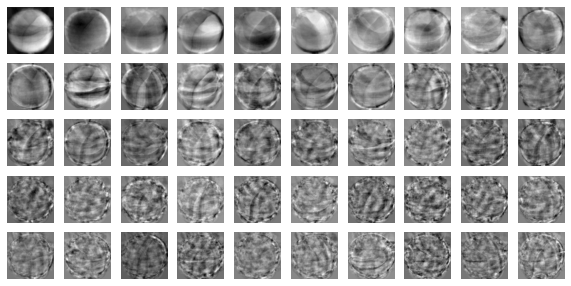

In [11]:
draw_fruits(pca.components_.reshape(-1,100,100))